In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve
plt.style.use('ggplot')

In [2]:
def crank_nicholson(type, expiration, sigma, r, strike, NAS, NTS):
    S_min = strike/3
    S_max = strike*2

    dS = (S_max-S_min)/NAS
    dt = expiration/NTS

    S = np.arange(0, NAS+1)* dS +S_min

    V = np.zeros((NAS + 1, NTS + 1))

    payoff = np.maximum((strike-S), 0)
    V[:, -1] = payoff
    V[-1, :] = 0
    V[0, :] = np.maximum(strike - S_min, 0) * np.exp(-r * np.linspace(0, expiration, NTS + 1)[::-1])

    I = np.arange(0,NAS+1)

    alpha = 0.25 * dt * ((sigma**2) * (I**2) - r*I)
    beta = -dt * 0.5 * (sigma**2 * (I**2) + r)
    gamma = 0.25 * dt * (sigma**2 * (I**2) + r * I)

    ML = sparse.diags([-alpha[2:], 1-beta[1:], -gamma[1:]], [-1,0,1], shape=(NAS-1, NAS-1)).tocsc()
    MR = sparse.diags([alpha[2:], 1+beta[1:], gamma[1:]], [-1,0,1], shape=(NAS-1, NAS-1)).tocsc()

    for t in range(NTS - 1, -1, -1):
        boundary_t = np.zeros(NAS - 1)
        boundary_t[0] = alpha[1] * (V[0, t] + V[0, t + 1]) -alpha[0] * V[0, t + 1]
        boundary_t[-1] = gamma[NAS - 1] * (V[NAS, t] + V[NAS, t + 1])
        b = MR.dot(V[1:NAS, t + 1]) + boundary_t
        V[1:NAS, t] = spsolve(ML, b)
        #V[0, t] = 2 * V[1, t] - V[2, t]


    asset_range = np.arange(0, NAS + 1) * dS  + S_min  # Asset price range
    time_steps = np.arange(0, NTS + 1) * dt
    rounded_time_steps = np.round(time_steps, decimals=3)
    df = pd.DataFrame(V, index=asset_range, columns=rounded_time_steps).round(3)

    return df

In [3]:
K =100
sigma = 0.2
r = 0.1
q = 0
expiration = 1
NAS = 1000  # Increased number of asset steps for better accuracy
NTS = 1000  # Increased number of time steps for better accuracy
type = "call"

option_df = crank_nicholson(type = type, strike = K, sigma = sigma, r = r,
                             expiration = expiration,
                             NAS = NAS, NTS = NTS)

In [4]:
option_df

,0.000,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,...,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1.000
33.333333,60.322,60.329,60.335,60.341,60.347,60.353,60.359,60.365,60.371,60.377,...,66.607,66.613,66.620,66.627,66.633,66.640,66.647,66.653,66.660,66.667
33.500000,60.156,60.162,60.168,60.174,60.180,60.186,60.192,60.198,60.204,60.210,...,66.440,66.447,66.453,66.460,66.467,66.473,66.480,66.487,66.493,66.500
33.666667,59.989,59.995,60.001,60.007,60.013,60.019,60.025,60.031,60.037,60.043,...,66.273,66.280,66.287,66.293,66.300,66.307,66.313,66.320,66.327,66.333
33.833333,59.822,59.829,59.835,59.841,59.847,59.853,59.859,59.865,59.871,59.877,...,66.107,66.113,66.120,66.127,66.133,66.140,66.147,66.153,66.160,66.167
34.000000,59.656,59.662,59.668,59.674,59.680,59.686,59.692,59.698,59.704,59.710,...,65.940,65.947,65.953,65.960,65.967,65.973,65.980,65.987,65.993,66.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199.333333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
199.500000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
199.666667,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
199.833333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


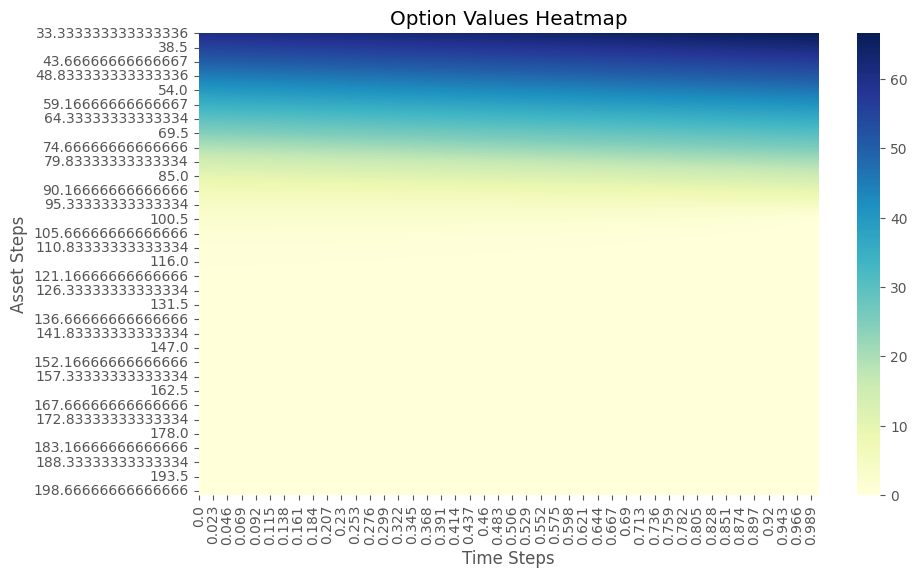

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(option_df, cmap='YlGnBu', fmt=".3f")
plt.title('Option Values Heatmap')
plt.xlabel('Time Steps')
plt.ylabel('Asset Steps')
plt.show()

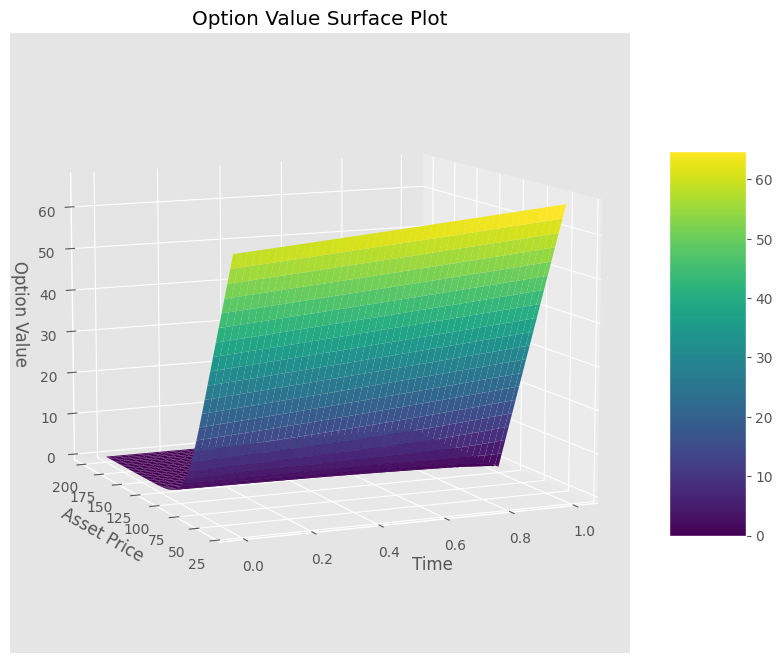

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

plot_df = option_df
X, Y = np.meshgrid(plot_df.columns, plot_df.index)
Z = plot_df.values

surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Time')
ax.set_ylabel('Asset Price')
ax.set_zlabel('Option Value')
ax.set_title('Option Value Surface Plot')

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(10, 196+50)

plt.show()


In [9]:
# Calculate the absolute error
absolute_error = option_df.iloc[:, 0] - option_df.iloc[:, -1]

# Calculate the percentage error (avoid division by zero)
percentage_error = ((absolute_error/100) / option_df.iloc[:, -1].replace(0, np.nan)) * 100

# Calculate the overall absolute error (e.g., using mean absolute error)
overall_absolute_error = absolute_error.abs().mean()

# Calculate the overall percentage error (e.g., using mean of absolute percentage error)
overall_percentage_error = percentage_error.abs().mean()

# Display the overall error and error percentage
print("Overall Error:", overall_absolute_error)
print("Overall Error Percentage:", overall_percentage_error,"%")

Overall Error: 2.2720819180819185
Overall Error Percentage: 0.2841106997252847 %
